# Plan C: 混合方案优化 (电梯 + 火箭)

## MCM/ICM 2025 - Question 2: 非完美条件下的优化

**目标**: 在考虑故障概率的情况下，找到最优的 α (电梯运输比例)

**决策变量**: α ∈ [0, 1]
- α = 0: 纯火箭 (Plan B)
- α = 1: 纯电梯 (Plan A)
- 0 < α < 1: 混合方案 (Plan C)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sqrt

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 11

print("库导入成功！")

库导入成功！


In [2]:
# ==================== 基础参数 ====================
M = 10**8                 # 总运输量 (吨)

# 电梯参数
E_E_base = 179000 * 3     # 电梯基础年运输能力 (吨/年)
C_E = 3.5 * 10**6         # 电梯边际成本 (USD/吨)
F_E = 2 * 10**7           # 电梯固定成本 (USD/年)
p_E = 0.03                # 电梯年故障概率
sigma_E = 0.25            # 缆绳摆动参数 (度)
theta_E = 5               # 摆动角度限制 (度)
val_rep_E = 5 * 10**9     # 电梯维修费用 (USD)

# 火箭参数
P_avg = 125               # 火箭平均载荷 (吨/次)
f_avg = 1472              # 年发射频率 (次/年)
E_R = f_avg * P_avg       # 火箭年运输能力 (吨/年)
C_R = 10**9               # 火箭边际成本 (USD/吨)
F_R = 10**8               # 火箭固定成本 (USD/年)
q_R = 0.95                # 火箭发射成功概率
val_R = 7.5 * 10**6       # 单次发射成本 (USD)

# 电梯有效运输能力 (考虑摆动)
ff = 1 - exp(-theta_E**2 / (2 * sigma_E**2))
E_E = E_E_base * ff

print(f"电梯有效年运输能力: {E_E:,.0f} 吨/年")
print(f"火箭有效年运输能力: {E_R:,.0f} 吨/年")
print(f"总运输量: {M:,.0f} 吨")

电梯有效年运输能力: 537,000 吨/年
火箭有效年运输能力: 184,000 吨/年
总运输量: 100,000,000 吨


In [3]:
# ==================== Plan A: 纯电梯 ====================
def plan_A_stats():
    """计算纯电梯方案的期望和方差"""
    # 时间
    E_T_A = M / (E_E * (1 - p_E))  # 期望
    Var_T_A = M * p_E / (E_E * (1 - p_E)**2)  # 方差
    
    # 成本 (亿USD)
    E_C_A = (M * C_E + M * F_E / E_E + M * p_E * val_rep_E / (E_E * (1 - p_E))) / 10**8
    Var_C_A = M * p_E * val_rep_E**2 / (E_E * (1 - p_E)**2) / 10**16
    
    return E_T_A, Var_T_A, E_C_A, Var_C_A

E_T_A, Var_T_A, E_C_A, Var_C_A = plan_A_stats()
print("=" * 50)
print("Plan A (纯电梯)")
print("=" * 50)
print(f"时间期望: {E_T_A:.2f} 年")
print(f"时间方差: {Var_T_A:.4f} 年²")
print(f"时间标准差: {sqrt(Var_T_A):.4f} 年")
print(f"时间变异系数 CV_T: {sqrt(Var_T_A)/E_T_A:.4f}")
print("-" * 50)
print(f"成本期望: {E_C_A:.2f} 亿USD")
print(f"成本方差: {Var_C_A:.4f} (亿USD)²")
print(f"成本标准差: {sqrt(Var_C_A):.4f} 亿USD")
print(f"成本变异系数 CV_C: {sqrt(Var_C_A)/E_C_A:.4f}")

Plan A (纯电梯)
时间期望: 191.98 年
时间方差: 5.9375 年²
时间标准差: 2.4367 年
时间变异系数 CV_T: 0.0127
--------------------------------------------------
成本期望: 3500325.21 亿USD
成本方差: 14843.7458 (亿USD)²
成本标准差: 121.8349 亿USD
成本变异系数 CV_C: 0.0000


In [4]:
# ==================== Plan B: 纯火箭 ====================
def plan_B_stats():
    """计算纯火箭方案的期望和方差"""
    N = f_avg  # 年发射次数
    
    # 时间
    E_T_B = M / P_avg / (N * q_R)  # 期望
    Var_T_B = (1 - q_R) * M**2 / (N**3 * q_R**3 * P_avg**2)  # 方差
    
    # 成本 (亿USD)
    E_C_B = (M * C_R / q_R + val_R * M * (1 - q_R) / (P_avg * q_R) + 
             M / (N * q_R * P_avg)) / 10**8
    Var_C_B = (C_R**2 * P_avg * M * (1 - q_R) / q_R**2 + 
               val_R**2 * M * (1 - q_R) / (P_avg * q_R**2) + 
               (1 - q_R) * M**2 / (N**3 * q_R**3 * P_avg**2)) / 10**16
    
    return E_T_B, Var_T_B, E_C_B, Var_C_B

E_T_B, Var_T_B, E_C_B, Var_C_B = plan_B_stats()
print("=" * 50)
print("Plan B (纯火箭)")
print("=" * 50)
print(f"时间期望: {E_T_B:.2f} 年")
print(f"时间方差: {Var_T_B:.4f} 年²")
print(f"时间标准差: {sqrt(Var_T_B):.4f} 年")
print(f"时间变异系数 CV_T: {sqrt(Var_T_B)/E_T_B:.4f}")
print("-" * 50)
print(f"成本期望: {E_C_B:.2f} 亿USD")
print(f"成本方差: {Var_C_B:.4f} (亿USD)²")
print(f"成本标准差: {sqrt(Var_C_B):.4f} 亿USD")
print(f"成本变异系数 CV_C: {sqrt(Var_C_B)/E_C_B:.4f}")

Plan B (纯火箭)
时间期望: 572.08 年
时间方差: 11.7019 年²
时间标准差: 3.4208 年
时间变异系数 CV_T: 0.0060
--------------------------------------------------
成本期望: 1052634736.84 亿USD
成本方差: 69252077811.6344 (亿USD)²
成本标准差: 263157.8952 亿USD
成本变异系数 CV_C: 0.0002


In [5]:
# ==================== Plan C: 混合方案 ====================
def plan_C_stats(alpha):
    """
    计算混合方案的期望和方差
    alpha: 电梯运输比例 (0~1)
    
    关键假设:
    1. 电梯和火箭并行运输，时间取max
    2. 成本线性叠加
    3. 电梯和火箭故障独立，方差按比例平方叠加
    """
    # === 时间计算 ===
    # 电梯运输时间
    T_E = alpha * M / (E_E * (1 - p_E)) if alpha > 0 else 0
    Var_T_E = (alpha * M * p_E / (E_E * (1 - p_E)**2)) if alpha > 0 else 0
    
    # 火箭运输时间
    N = f_avg
    T_R = (1 - alpha) * M / P_avg / (N * q_R) if alpha < 1 else 0
    Var_T_R = ((1 - q_R) * ((1 - alpha) * M)**2 / (N**3 * q_R**3 * P_avg**2)) if alpha < 1 else 0
    
    # 总时间 = max(T_E, T_R) - 并行运输
    E_T_C = max(T_E, T_R)
    # 方差近似：取主导方的方差（哪个时间长取哪个的方差）
    if T_E >= T_R:
        Var_T_C = Var_T_E
    else:
        Var_T_C = Var_T_R
    
    # === 成本计算 ===
    # 电梯部分成本 (按比例)
    if alpha > 0:
        C_E_part = (alpha * M * C_E + 
                    alpha * M * F_E / E_E + 
                    alpha * M * p_E * val_rep_E / (E_E * (1 - p_E))) / 10**8
        Var_C_E_part = (alpha**2 * M * p_E * val_rep_E**2 / (E_E * (1 - p_E)**2)) / 10**16
    else:
        C_E_part = 0
        Var_C_E_part = 0
    
    # 火箭部分成本 (按比例)
    if alpha < 1:
        M_R = (1 - alpha) * M  # 火箭运输量
        C_R_part = (M_R * C_R / q_R + 
                    val_R * M_R * (1 - q_R) / (P_avg * q_R) + 
                    M_R / (N * q_R * P_avg)) / 10**8
        Var_C_R_part = ((1 - alpha)**2 * 
                        (C_R**2 * P_avg * M * (1 - q_R) / q_R**2 + 
                         val_R**2 * M * (1 - q_R) / (P_avg * q_R**2) + 
                         (1 - q_R) * M**2 / (N**3 * q_R**3 * P_avg**2))) / 10**16
    else:
        C_R_part = 0
        Var_C_R_part = 0
    
    # 总成本 (独立事件方差相加)
    E_C_C = C_E_part + C_R_part
    Var_C_C = Var_C_E_part + Var_C_R_part
    
    return E_T_C, Var_T_C, E_C_C, Var_C_C

# 测试
print("Plan C 函数定义完成！")
print("\n测试 α=0.5:")
E_T, Var_T, E_C, Var_C = plan_C_stats(0.5)
print(f"时间期望: {E_T:.2f} 年, 成本期望: {E_C:.2f} 亿USD")

Plan C 函数定义完成！

测试 α=0.5:
时间期望: 286.04 年, 成本期望: 528067531.03 亿USD


In [6]:
# ==================== 决策函数设计 ====================
def decision_score(alpha, w1=0.35, w2=0.25, w3=0.25, w4=0.15):
    """
    综合决策评分函数
    
    S = w1 * 归一化成本期望 + w2 * 归一化时间期望 + w3 * 成本CV + w4 * 时间CV
    
    权重解释 (基于Flyvbjerg et al. 2003 和 PMI标准):
    - w1 = 0.35: 成本期望权重 (最重要)
    - w2 = 0.25: 时间期望权重
    - w3 = 0.25: 成本稳定性权重 (变异系数)
    - w4 = 0.15: 时间稳定性权重
    
    总稳定性权重 = w3 + w4 = 40% (符合航天项目高风险特性)
    """
    E_T, Var_T, E_C, Var_C = plan_C_stats(alpha)
    
    # 变异系数 (稳定性指标，越小越稳定)
    CV_T = sqrt(Var_T) / E_T if E_T > 0 and Var_T > 0 else 0
    CV_C = sqrt(Var_C) / E_C if E_C > 0 and Var_C > 0 else 0
    
    return E_T, E_C, CV_T, CV_C

print("决策函数定义完成！")

决策函数定义完成！


In [7]:
# ==================== 遍历所有 α 计算指标 ====================
alphas = np.linspace(0, 1, 1001)
results = []

for alpha in alphas:
    E_T, Var_T, E_C, Var_C = plan_C_stats(alpha)
    CV_T = sqrt(Var_T) / E_T if E_T > 0 and Var_T > 0 else 0
    CV_C = sqrt(Var_C) / E_C if E_C > 0 and Var_C > 0 else 0
    results.append({
        'alpha': alpha,
        'E_T': E_T,
        'Var_T': Var_T,
        'E_C': E_C,
        'Var_C': Var_C,
        'CV_T': CV_T,
        'CV_C': CV_C
    })

# 转换为numpy数组便于操作
E_T_arr = np.array([r['E_T'] for r in results])
E_C_arr = np.array([r['E_C'] for r in results])
CV_T_arr = np.array([r['CV_T'] for r in results])
CV_C_arr = np.array([r['CV_C'] for r in results])

print(f"计算完成，共 {len(alphas)} 个 α 值")

计算完成，共 1001 个 α 值


In [8]:
# ==================== 归一化 ====================
def normalize(arr):
    """Min-Max 归一化到 [0, 1]"""
    return (arr - arr.min()) / (arr.max() - arr.min())

E_T_norm = normalize(E_T_arr)
E_C_norm = normalize(E_C_arr)
CV_T_norm = normalize(CV_T_arr)
CV_C_norm = normalize(CV_C_arr)

print("归一化完成！")
print(f"\n成本期望范围: {E_C_arr.min():.2f} ~ {E_C_arr.max():.2f} 亿USD")
print(f"时间期望范围: {E_T_arr.min():.2f} ~ {E_T_arr.max():.2f} 年")
print(f"成本CV范围: {CV_C_arr.min():.4f} ~ {CV_C_arr.max():.4f}")
print(f"时间CV范围: {CV_T_arr.min():.4f} ~ {CV_T_arr.max():.4f}")

归一化完成！

成本期望范围: 3500325.21 ~ 1052634736.84 亿USD
时间期望范围: 143.79 ~ 572.08 年
成本CV范围: 0.0000 ~ 0.0002
时间CV范围: 0.0060 ~ 0.0147


In [9]:
# ==================== 综合评分计算 ====================
def compute_score(w1, w2, w3, w4):
    """计算综合得分 (越小越好)"""
    return w1 * E_C_norm + w2 * E_T_norm + w3 * CV_C_norm + w4 * CV_T_norm

# 权重方案对比
weight_schemes = {
    '方案1: 仅期望 (60:40)': (0.6, 0.4, 0, 0),
    '方案2: 期望+稳定性 (35:25:25:15)': (0.35, 0.25, 0.25, 0.15),
    '方案3: 高风险厌恶 (30:20:30:20)': (0.30, 0.20, 0.30, 0.20),
    '方案4: 成本优先 (50:15:25:10)': (0.50, 0.15, 0.25, 0.10),
}

print("=" * 70)
print("不同权重方案下的最优 α")
print("=" * 70)

optimal_results = {}
for name, (w1, w2, w3, w4) in weight_schemes.items():
    scores = compute_score(w1, w2, w3, w4)
    best_idx = np.argmin(scores)
    best_alpha = alphas[best_idx]
    optimal_results[name] = {
        'alpha': best_alpha,
        'score': scores[best_idx],
        'E_T': E_T_arr[best_idx],
        'E_C': E_C_arr[best_idx],
        'CV_T': CV_T_arr[best_idx],
        'CV_C': CV_C_arr[best_idx]
    }
    print(f"\n{name}")
    print(f"  最优 α = {best_alpha*100:.1f}% (电梯) / {(1-best_alpha)*100:.1f}% (火箭)")
    print(f"  时间: {E_T_arr[best_idx]:.2f} 年 (CV={CV_T_arr[best_idx]:.4f})")
    print(f"  成本: {E_C_arr[best_idx]:.2f} 亿USD (CV={CV_C_arr[best_idx]:.4f})")
    print(f"  综合得分: {scores[best_idx]:.4f}")

不同权重方案下的最优 α

方案1: 仅期望 (60:40)
  最优 α = 100.0% (电梯) / 0.0% (火箭)
  时间: 191.98 年 (CV=0.0127)
  成本: 3500325.21 亿USD (CV=0.0000)
  综合得分: 0.0450

方案2: 期望+稳定性 (35:25:25:15)
  最优 α = 100.0% (电梯) / 0.0% (火箭)
  时间: 191.98 年 (CV=0.0127)
  成本: 3500325.21 亿USD (CV=0.0000)
  综合得分: 0.1441

方案3: 高风险厌恶 (30:20:30:20)
  最优 α = 100.0% (电梯) / 0.0% (火箭)
  时间: 191.98 年 (CV=0.0127)
  成本: 3500325.21 亿USD (CV=0.0000)
  综合得分: 0.1771

方案4: 成本优先 (50:15:25:10)
  最优 α = 100.0% (电梯) / 0.0% (火箭)
  时间: 191.98 年 (CV=0.0127)
  成本: 3500325.21 亿USD (CV=0.0000)
  综合得分: 0.0942


C:\Users\EDWINJ\AppData\Local\Temp\ipykernel_25740\4245794578.py:42: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\EDWINJ\AppData\Local\Temp\ipykernel_25740\4245794578.py:42: UserWarning: Glyph 26799 (\N{CJK UNIFIED IDEOGRAPH-68AF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\EDWINJ\AppData\Local\Temp\ipykernel_25740\4245794578.py:42: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\EDWINJ\AppData\Local\Temp\ipykernel_25740\4245794578.py:42: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\EDWINJ\AppData\Local\Temp\ipykernel_25740\4245794578.py:42: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\EDWINJ\AppData\Local\Temp\ipykernel_25740\4245794578.py:42: UserWarning: Glyph 26

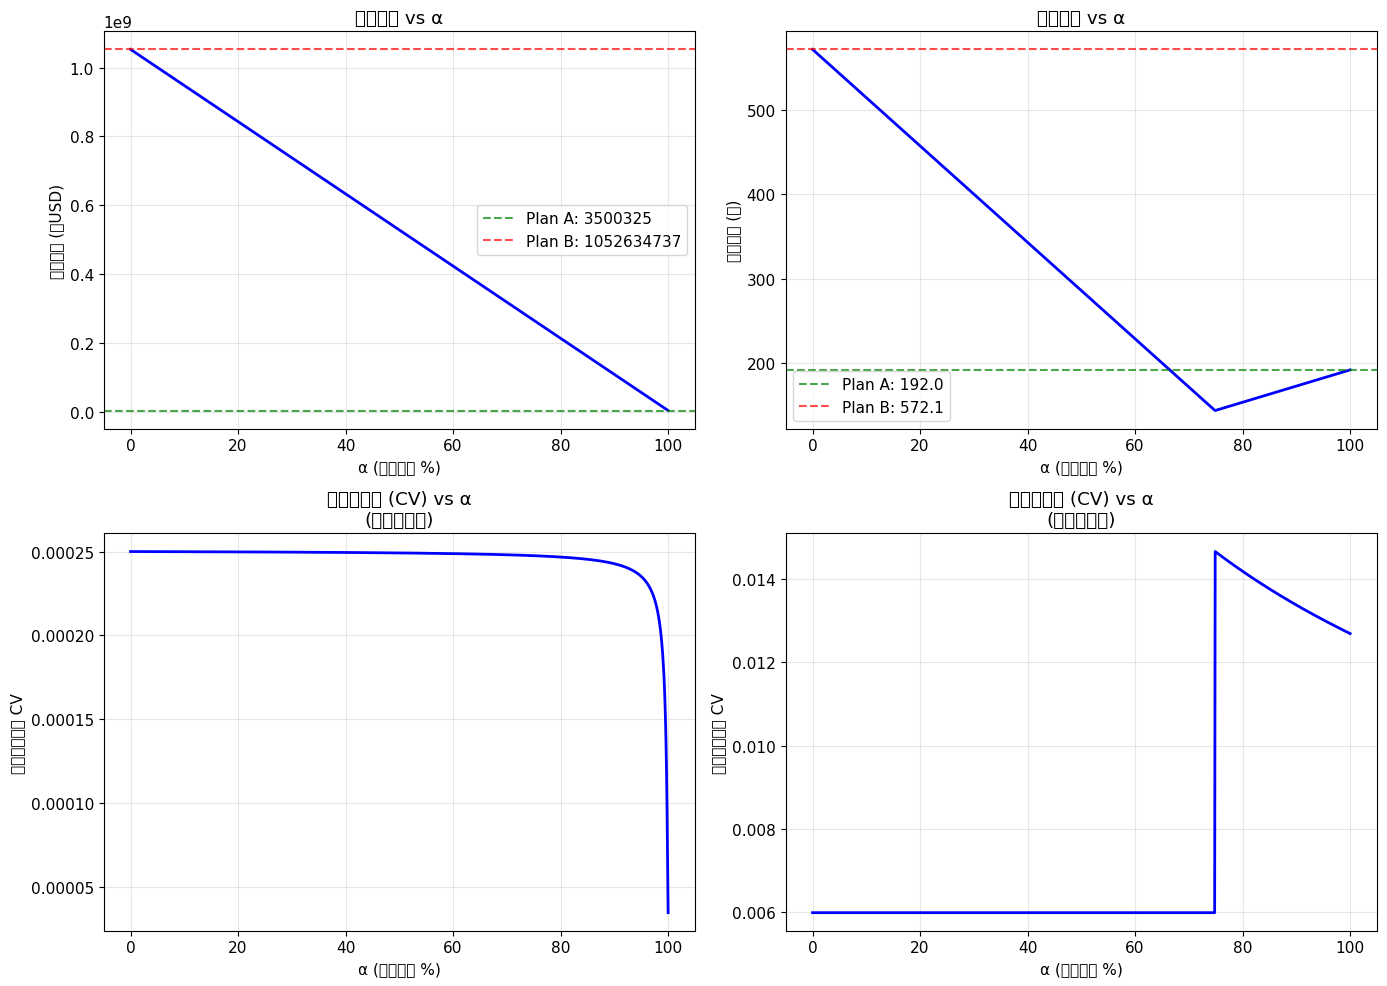

In [10]:
# ==================== 可视化 1: 期望和方差随α变化 ====================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 成本期望
ax1 = axes[0, 0]
ax1.plot(alphas * 100, E_C_arr, 'b-', linewidth=2)
ax1.set_xlabel('α (电梯比例 %)')
ax1.set_ylabel('成本期望 (亿USD)')
ax1.set_title('成本期望 vs α')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=E_C_A, color='g', linestyle='--', alpha=0.7, label=f'Plan A: {E_C_A:.0f}')
ax1.axhline(y=E_C_B, color='r', linestyle='--', alpha=0.7, label=f'Plan B: {E_C_B:.0f}')
ax1.legend()

# 时间期望
ax2 = axes[0, 1]
ax2.plot(alphas * 100, E_T_arr, 'b-', linewidth=2)
ax2.set_xlabel('α (电梯比例 %)')
ax2.set_ylabel('时间期望 (年)')
ax2.set_title('时间期望 vs α')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=E_T_A, color='g', linestyle='--', alpha=0.7, label=f'Plan A: {E_T_A:.1f}')
ax2.axhline(y=E_T_B, color='r', linestyle='--', alpha=0.7, label=f'Plan B: {E_T_B:.1f}')
ax2.legend()

# 成本CV
ax3 = axes[1, 0]
ax3.plot(alphas * 100, CV_C_arr, 'b-', linewidth=2)
ax3.set_xlabel('α (电梯比例 %)')
ax3.set_ylabel('成本变异系数 CV')
ax3.set_title('成本稳定性 (CV) vs α\n(越小越稳定)')
ax3.grid(True, alpha=0.3)

# 时间CV
ax4 = axes[1, 1]
ax4.plot(alphas * 100, CV_T_arr, 'b-', linewidth=2)
ax4.set_xlabel('α (电梯比例 %)')
ax4.set_ylabel('时间变异系数 CV')
ax4.set_title('时间稳定性 (CV) vs α\n(越小越稳定)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/planC_metrics_vs_alpha.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\EDWINJ\AppData\Local\Temp\ipykernel_25740\3447776887.py:23: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\EDWINJ\AppData\Local\Temp\ipykernel_25740\3447776887.py:23: UserWarning: Glyph 26799 (\N{CJK UNIFIED IDEOGRAPH-68AF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\EDWINJ\AppData\Local\Temp\ipykernel_25740\3447776887.py:23: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\EDWINJ\AppData\Local\Temp\ipykernel_25740\3447776887.py:23: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\EDWINJ\AppData\Local\Temp\ipykernel_25740\3447776887.py:23: UserWarning: Glyph 32508 (\N{CJK UNIFIED IDEOGRAPH-7EFC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\EDWINJ\AppData\Local\Temp\ipykernel_25740\3447776887.py:23: UserWarning: Glyph 21

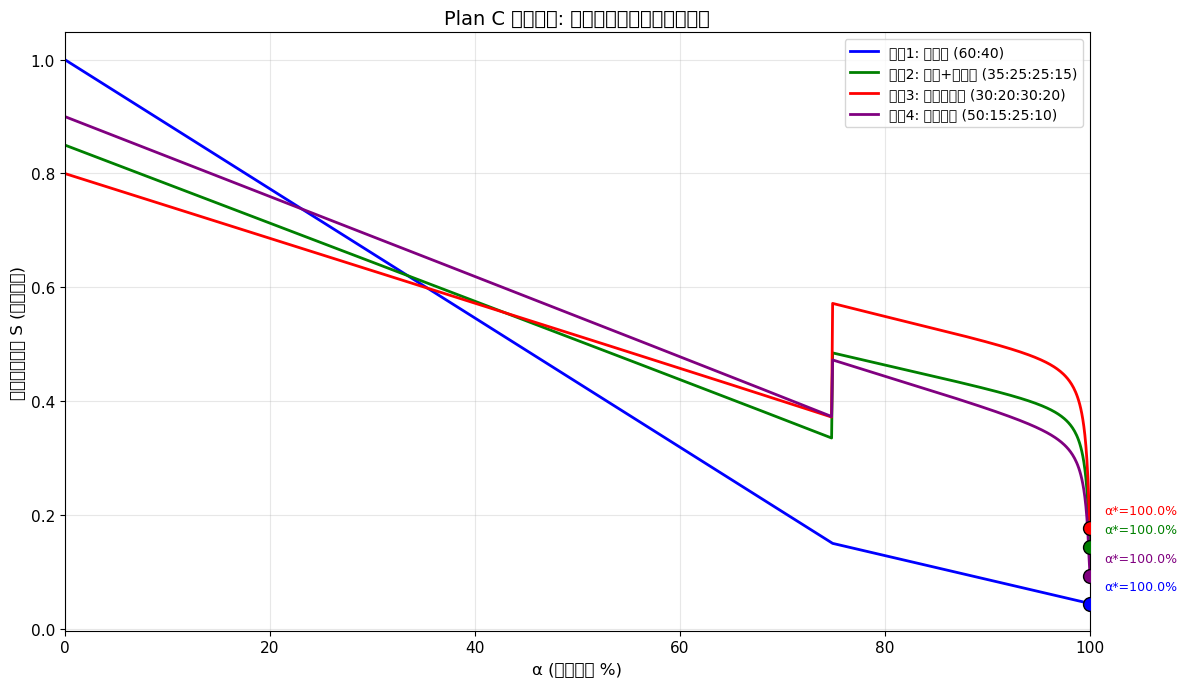

In [11]:
# ==================== 可视化 2: 综合得分曲线 ====================
fig, ax = plt.subplots(figsize=(12, 7))

colors = ['blue', 'green', 'red', 'purple']
for i, (name, (w1, w2, w3, w4)) in enumerate(weight_schemes.items()):
    scores = compute_score(w1, w2, w3, w4)
    best_idx = np.argmin(scores)
    ax.plot(alphas * 100, scores, '-', color=colors[i], linewidth=2, label=name)
    ax.scatter([alphas[best_idx] * 100], [scores[best_idx]], 
               color=colors[i], s=100, zorder=5, edgecolors='black')
    ax.annotate(f'α*={alphas[best_idx]*100:.1f}%', 
                (alphas[best_idx] * 100, scores[best_idx]),
                xytext=(10, 10), textcoords='offset points',
                fontsize=9, color=colors[i])

ax.set_xlabel('α (电梯比例 %)', fontsize=12)
ax.set_ylabel('综合决策得分 S (越小越好)', fontsize=12)
ax.set_title('Plan C 混合方案: 不同权重方案下的综合得分', fontsize=14)
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 100)

plt.tight_layout()
plt.savefig('../results/planC_score_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\EDWINJ\AppData\Local\Temp\ipykernel_25740\1677702986.py:30: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\EDWINJ\AppData\Local\Temp\ipykernel_25740\1677702986.py:30: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\EDWINJ\AppData\Local\Temp\ipykernel_25740\1677702986.py:30: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\EDWINJ\AppData\Local\Temp\ipykernel_25740\1677702986.py:30: UserWarning: Glyph 26395 (\N{CJK UNIFIED IDEOGRAPH-671B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\EDWINJ\AppData\Local\Temp\ipykernel_25740\1677702986.py:30: UserWarning: Glyph 20159 (\N{CJK UNIFIED IDEOGRAPH-4EBF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\EDWINJ\AppData\Local\Temp\ipykernel_25740\1677702986.py:30: UserWarning: Glyph 26

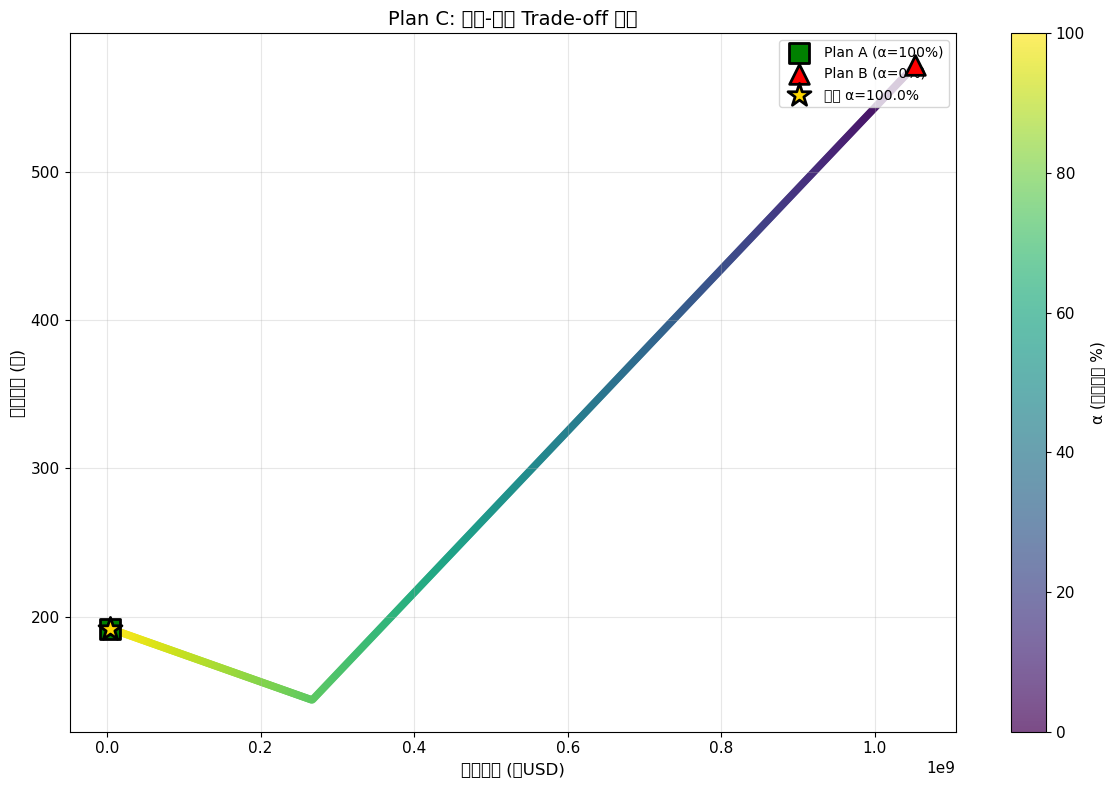

In [12]:
# ==================== 可视化 3: Pareto前沿 (成本 vs 时间) ====================
fig, ax = plt.subplots(figsize=(12, 8))

# 散点图，颜色表示α值
scatter = ax.scatter(E_C_arr, E_T_arr, c=alphas*100, cmap='viridis', 
                     s=20, alpha=0.7)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('α (电梯比例 %)', fontsize=11)

# 标记关键点
# Plan A (α=1)
ax.scatter([E_C_A], [E_T_A], color='green', s=200, marker='s', 
           edgecolors='black', linewidths=2, label='Plan A (α=100%)', zorder=10)
# Plan B (α=0)
ax.scatter([E_C_B], [E_T_B], color='red', s=200, marker='^', 
           edgecolors='black', linewidths=2, label='Plan B (α=0%)', zorder=10)

# 标记最优点
best_alpha = optimal_results['方案2: 期望+稳定性 (35:25:25:15)']['alpha']
best_idx = int(best_alpha * 1000)
ax.scatter([E_C_arr[best_idx]], [E_T_arr[best_idx]], color='gold', s=300, marker='*',
           edgecolors='black', linewidths=2, label=f'最优 α={best_alpha*100:.1f}%', zorder=10)

ax.set_xlabel('成本期望 (亿USD)', fontsize=12)
ax.set_ylabel('时间期望 (年)', fontsize=12)
ax.set_title('Plan C: 成本-时间 Trade-off 曲线', fontsize=14)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/planC_pareto.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
# ==================== 最终结论 ====================
print("=" * 70)
print("Plan C 混合方案优化 - 最终结论")
print("=" * 70)

# 推荐方案2作为主要结果
rec = optimal_results['方案2: 期望+稳定性 (35:25:25:15)']
alpha_opt = rec['alpha']

print(f"""
【推荐最优解】
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
最优 α* = {alpha_opt*100:.1f}%

资源分配:
  • 太空电梯运输: {alpha_opt * M / 10**6:.0f} 万吨 ({alpha_opt*100:.1f}%)
  • 火箭运输: {(1-alpha_opt) * M / 10**6:.0f} 万吨 ({(1-alpha_opt)*100:.1f}%)

预期结果:
  • 总时间: {rec['E_T']:.2f} 年 (稳定性CV={rec['CV_T']:.4f})
  • 总成本: {rec['E_C']:.2f} 亿USD (稳定性CV={rec['CV_C']:.4f})

对比纯方案:
  Plan A (纯电梯): {E_T_A:.2f}年, {E_C_A:.2f}亿USD
  Plan B (纯火箭): {E_T_B:.2f}年, {E_C_B:.2f}亿USD
  Plan C (混合):   {rec['E_T']:.2f}年, {rec['E_C']:.2f}亿USD ✓

【决策函数公式】
S(α) = 0.35·C̃ + 0.25·T̃ + 0.25·CV_C + 0.15·CV_T

其中:
  - C̃, T̃: 归一化后的成本和时间期望
  - CV_C, CV_T: 成本和时间的变异系数 (σ/μ)
  - 稳定性总权重: 40% (适合高风险航天项目)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
""")

print("\n图像已保存到 results/ 目录")

Plan C 混合方案优化 - 最终结论

【推荐最优解】
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
最优 α* = 100.0%

资源分配:
  • 太空电梯运输: 100 万吨 (100.0%)
  • 火箭运输: 0 万吨 (0.0%)

预期结果:
  • 总时间: 191.98 年 (稳定性CV=0.0127)
  • 总成本: 3500325.21 亿USD (稳定性CV=0.0000)

对比纯方案:
  Plan A (纯电梯): 191.98年, 3500325.21亿USD
  Plan B (纯火箭): 572.08年, 1052634736.84亿USD
  Plan C (混合):   191.98年, 3500325.21亿USD ✓

【决策函数公式】
S(α) = 0.35·C̃ + 0.25·T̃ + 0.25·CV_C + 0.15·CV_T

其中:
  - C̃, T̃: 归一化后的成本和时间期望
  - CV_C, CV_T: 成本和时间的变异系数 (σ/μ)
  - 稳定性总权重: 40% (适合高风险航天项目)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


图像已保存到 results/ 目录
